Importing Packages ...

In [330]:
import pandas as pd
import json
import glob
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm
import matplotlib.pyplot as plt

Reading and combining jSON files downloaded from openFDA

In [2]:
path = '/home/shreyas/AstraZeneca' 
all_files = glob.glob(path + "/*.json")

li = []

for p in all_files:
    with open(p, 'r') as f:
        doc = json.load(f)
        df=pd.DataFrame(doc['results'])
        li.append(df)

Making dataframe of the combined data

In [3]:
frame = pd.concat(li, axis=0, ignore_index=True)


/home/shreyas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


There are too many columns and we want to display all the columns 

In [4]:
pd.set_option('display.max_columns', 500)


In [5]:
frame.head(4)

,abuse,abuse_table,accessories,active_ingredient,active_ingredient_table,adverse_reactions,adverse_reactions_table,alarms,alarms_table,animal_pharmacology_and_or_toxicology,animal_pharmacology_and_or_toxicology_table,ask_doctor,ask_doctor_or_pharmacist,ask_doctor_or_pharmacist_table,ask_doctor_table,assembly_or_installation_instructions,boxed_warning,boxed_warning_table,calibration_instructions,carcinogenesis_and_mutagenesis_and_impairment_of_fertility,carcinogenesis_and_mutagenesis_and_impairment_of_fertility_table,cleaning,clinical_pharmacology,clinical_pharmacology_table,clinical_studies,clinical_studies_table,components,contraindications,contraindications_table,controlled_substance,dependence,dependence_table,description,description_table,diagram_of_device,disposal_and_waste_handling,do_not_use,do_not_use_table,dosage_and_administration,dosage_and_administration_table,dosage_forms_and_strengths,dosage_forms_and_strengths_table,drug_abuse_and_dependence,drug_abuse_and_dependence_table,drug_and_or_laboratory_test_interactions,drug_and_or_laboratory_test_interactions_table,drug_interactions,drug_interactions_table,effective_time,environmental_warning,food_safety_warning,general_precautions,general_precautions_table,geriatric_use,geriatric_use_table,guaranteed_analysis_of_feed,health_care_provider_letter,health_care_provider_letter_table,health_claim,health_claim_table,how_supplied,how_supplied_table,id,inactive_ingredient,inactive_ingredient_table,indications_and_usage,indications_and_usage_table,information_for_owners_or_caregivers,information_for_owners_or_caregivers_table,information_for_patients,information_for_patients_table,instructions_for_use,instructions_for_use_table,intended_use_of_the_device,keep_out_of_reach_of_children,keep_out_of_reach_of_children_table,labor_and_delivery,laboratory_tests,laboratory_tests_table,mechanism_of_action,mechanism_of_action_table,microbiology,microbiology_table,nonclinical_toxicology,nonclinical_toxicology_table,nonteratogenic_effects,nonteratogenic_effects_table,nursing_mothers,nursing_mothers_table,openfda,other_safety_information,other_safety_information_table,overdosage,overdosage_table,package_label_principal_display_panel,package_label_principal_display_panel_table,patient_medication_information,patient_medication_information_table,pediatric_use,pediatric_use_table,pharmacodynamics,pharmacodynamics_table,pharmacogenomics,pharmacogenomics_table,pharmacokinetics,pharmacokinetics_table,precautions,precautions_table,pregnancy,pregnancy_or_breast_feeding,pregnancy_or_breast_feeding_table,pregnancy_table,purpose,purpose_table,questions,questions_table,recent_major_changes,recent_major_changes_table,references,references_table,residue_warning,risks,risks_table,route,safe_handling_warning,safe_handling_warning_table,set_id,spl_indexing_data_elements,spl_medguide,spl_medguide_table,spl_patient_package_insert,spl_patient_package_insert_table,spl_product_data_elements,spl_unclassified_section,spl_unclassified_section_table,statement_of_identity,statement_of_identity_table,stop_use,stop_use_table,storage_and_handling,storage_and_handling_table,summary_of_safety_and_effectiveness,teratogenic_effects,teratogenic_effects_table,troubleshooting,use_in_specific_populations,use_in_specific_populations_table,user_safety_warnings,version,veterinary_indications,warnings,warnings_and_cautions,warnings_and_cautions_table,warnings_table,when_using,when_using_table
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20130225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41e6b368-ce10-4a6b-a25c-42ce690b0eb0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'manufacturer_name': ['Fenwal, Inc.'], 'unii'...",NaN,NaN,NaN,NaN,[PACKAGE/LABEL DISPLAY PANEL Code 4R6001 3 Uni...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [6]:
type(frame['openfda'][1])

dict

Seems like there is a column called 'openfda' which contain some information in the form of key value pair. Lets transform that column to get the information contained in it in different columns

In [7]:
openfdaDf=pd.DataFrame(x for x in frame['openfda'])
frame = frame.drop('openfda',axis=1)

In [8]:
drugs = pd.concat([frame,openfdaDf],axis=1)

This dataframe displays all the necessary columns

In [9]:
drugs.head(4)

,abuse,abuse_table,accessories,active_ingredient,active_ingredient_table,adverse_reactions,adverse_reactions_table,alarms,alarms_table,animal_pharmacology_and_or_toxicology,animal_pharmacology_and_or_toxicology_table,ask_doctor,ask_doctor_or_pharmacist,ask_doctor_or_pharmacist_table,ask_doctor_table,assembly_or_installation_instructions,boxed_warning,boxed_warning_table,calibration_instructions,carcinogenesis_and_mutagenesis_and_impairment_of_fertility,carcinogenesis_and_mutagenesis_and_impairment_of_fertility_table,cleaning,clinical_pharmacology,clinical_pharmacology_table,clinical_studies,clinical_studies_table,components,contraindications,contraindications_table,controlled_substance,dependence,dependence_table,description,description_table,diagram_of_device,disposal_and_waste_handling,do_not_use,do_not_use_table,dosage_and_administration,dosage_and_administration_table,dosage_forms_and_strengths,dosage_forms_and_strengths_table,drug_abuse_and_dependence,drug_abuse_and_dependence_table,drug_and_or_laboratory_test_interactions,drug_and_or_laboratory_test_interactions_table,drug_interactions,drug_interactions_table,effective_time,environmental_warning,food_safety_warning,general_precautions,general_precautions_table,geriatric_use,geriatric_use_table,guaranteed_analysis_of_feed,health_care_provider_letter,health_care_provider_letter_table,health_claim,health_claim_table,how_supplied,how_supplied_table,id,inactive_ingredient,inactive_ingredient_table,indications_and_usage,indications_and_usage_table,information_for_owners_or_caregivers,information_for_owners_or_caregivers_table,information_for_patients,information_for_patients_table,instructions_for_use,instructions_for_use_table,intended_use_of_the_device,keep_out_of_reach_of_children,keep_out_of_reach_of_children_table,labor_and_delivery,laboratory_tests,laboratory_tests_table,mechanism_of_action,mechanism_of_action_table,microbiology,microbiology_table,nonclinical_toxicology,nonclinical_toxicology_table,nonteratogenic_effects,nonteratogenic_effects_table,nursing_mothers,nursing_mothers_table,other_safety_information,other_safety_information_table,overdosage,overdosage_table,package_label_principal_display_panel,package_label_principal_display_panel_table,patient_medication_information,patient_medication_information_table,pediatric_use,pediatric_use_table,pharmacodynamics,pharmacodynamics_table,pharmacogenomics,pharmacogenomics_table,pharmacokinetics,pharmacokinetics_table,precautions,precautions_table,pregnancy,pregnancy_or_breast_feeding,pregnancy_or_breast_feeding_table,pregnancy_table,purpose,purpose_table,questions,questions_table,recent_major_changes,recent_major_changes_table,references,references_table,residue_warning,risks,risks_table,route,safe_handling_warning,safe_handling_warning_table,set_id,spl_indexing_data_elements,spl_medguide,spl_medguide_table,spl_patient_package_insert,spl_patient_package_insert_table,spl_product_data_elements,spl_unclassified_section,spl_unclassified_section_table,statement_of_identity,statement_of_identity_table,stop_use,stop_use_table,storage_and_handling,storage_and_handling_table,summary_of_safety_and_effectiveness,teratogenic_effects,teratogenic_effects_table,troubleshooting,use_in_specific_populations,use_in_specific_populations_table,user_safety_warnings,version,veterinary_indications,warnings,warnings_and_cautions,warnings_and_cautions_table,warnings_table,when_using,when_using_table,application_number,brand_name,generic_name,is_original_packager,manufacturer_name,nui,original_packager_product_ndc,package_ndc,pharm_class_cs,pharm_class_epc,pharm_class_moa,pharm_class_pe,product_ndc,product_type,route,rxcui,spl_id,spl_set_id,substance_name,unii,upc
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20130225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41e6b368-ce10-4a6b-a25c-42ce690b0

we want to get only those drugs which are manufactured by AstraZeneca. But, the column manufacturer_name is as a list and also it contains some of the missing values. Let, deal with those problems. 

In [10]:
drugs=drugs.dropna(subset=['manufacturer_name'])

In [11]:
drugs['manufacturer_name'] = drugs['manufacturer_name'].apply(lambda x: ''.join(map(str, x)))

Make subset of the drug dataframe which are manufactured by Astrazeneca.

In [12]:
astraZeneca=drugs[drugs['manufacturer_name'].str.contains(("AstraZeneca"))]

Let's convert string type effective time into datetime

In [13]:
astraZeneca['effective_time']=pd.to_datetime(astraZeneca['effective_time'])

/home/shreyas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
astraZeneca.head(3)

,abuse,abuse_table,accessories,active_ingredient,active_ingredient_table,adverse_reactions,adverse_reactions_table,alarms,alarms_table,animal_pharmacology_and_or_toxicology,animal_pharmacology_and_or_toxicology_table,ask_doctor,ask_doctor_or_pharmacist,ask_doctor_or_pharmacist_table,ask_doctor_table,assembly_or_installation_instructions,boxed_warning,boxed_warning_table,calibration_instructions,carcinogenesis_and_mutagenesis_and_impairment_of_fertility,carcinogenesis_and_mutagenesis_and_impairment_of_fertility_table,cleaning,clinical_pharmacology,clinical_pharmacology_table,clinical_studies,clinical_studies_table,components,contraindications,contraindications_table,controlled_substance,dependence,dependence_table,description,description_table,diagram_of_device,disposal_and_waste_handling,do_not_use,do_not_use_table,dosage_and_administration,dosage_and_administration_table,dosage_forms_and_strengths,dosage_forms_and_strengths_table,drug_abuse_and_dependence,drug_abuse_and_dependence_table,drug_and_or_laboratory_test_interactions,drug_and_or_laboratory_test_interactions_table,drug_interactions,drug_interactions_table,effective_time,environmental_warning,food_safety_warning,general_precautions,general_precautions_table,geriatric_use,geriatric_use_table,guaranteed_analysis_of_feed,health_care_provider_letter,health_care_provider_letter_table,health_claim,health_claim_table,how_supplied,how_supplied_table,id,inactive_ingredient,inactive_ingredient_table,indications_and_usage,indications_and_usage_table,information_for_owners_or_caregivers,information_for_owners_or_caregivers_table,information_for_patients,information_for_patients_table,instructions_for_use,instructions_for_use_table,intended_use_of_the_device,keep_out_of_reach_of_children,keep_out_of_reach_of_children_table,labor_and_delivery,laboratory_tests,laboratory_tests_table,mechanism_of_action,mechanism_of_action_table,microbiology,microbiology_table,nonclinical_toxicology,nonclinical_toxicology_table,nonteratogenic_effects,nonteratogenic_effects_table,nursing_mothers,nursing_mothers_table,other_safety_information,other_safety_information_table,overdosage,overdosage_table,package_label_principal_display_panel,package_label_principal_display_panel_table,patient_medication_information,patient_medication_information_table,pediatric_use,pediatric_use_table,pharmacodynamics,pharmacodynamics_table,pharmacogenomics,pharmacogenomics_table,pharmacokinetics,pharmacokinetics_table,precautions,precautions_table,pregnancy,pregnancy_or_breast_feeding,pregnancy_or_breast_feeding_table,pregnancy_table,purpose,purpose_table,questions,questions_table,recent_major_changes,recent_major_changes_table,references,references_table,residue_warning,risks,risks_table,route,safe_handling_warning,safe_handling_warning_table,set_id,spl_indexing_data_elements,spl_medguide,spl_medguide_table,spl_patient_package_insert,spl_patient_package_insert_table,spl_product_data_elements,spl_unclassified_section,spl_unclassified_section_table,statement_of_identity,statement_of_identity_table,stop_use,stop_use_table,storage_and_handling,storage_and_handling_table,summary_of_safety_and_effectiveness,teratogenic_effects,teratogenic_effects_table,troubleshooting,use_in_specific_populations,use_in_specific_populations_table,user_safety_warnings,version,veterinary_indications,warnings,warnings_and_cautions,warnings_and_cautions_table,warnings_table,when_using,when_using_table,application_number,brand_name,generic_name,is_original_packager,manufacturer_name,nui,original_packager_product_ndc,package_ndc,pharm_class_cs,pharm_class_epc,pharm_class_moa,pharm_class_pe,product_ndc,product_type,route,rxcui,spl_id,spl_set_id,substance_name,unii,upc
23671,NaN,NaN,NaN,NaN,NaN,[6 ADVERSE REACTIONS The following serious adv...,"[<table width=""100%""> <caption>Table 1. Advers...",NaN,NaN,[13.2 Animal Toxicology and/or Pharmacology Ce...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[13.1 Carcinogenesis, Mutagenesis, Impairment ...",NaN,NaN,[12 

### Part A

Keep only those columns which are required 

In [15]:
astraZenecaA=astraZeneca[['effective_time','brand_name','spl_product_data_elements']]

In [16]:
astraZenecaA['brand_name'] = astraZenecaA['brand_name'].apply(lambda x: ''.join(map(str, x)))

/home/shreyas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Extract year from effective time

In [17]:
astraZenecaA['year']=(astraZenecaA['effective_time']).dt.year

/home/shreyas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
astraZenecaA.head(3)

,effective_time,brand_name,spl_product_data_elements,year
23671,2018-11-09,CRESTOR,[CRESTOR Rosuvastatin calcium ROSUVASTATIN CAL...,2018
27978,2018-11-29,SEROQUEL,[SEROQUEL Quetiapine fumarate QUETIAPINE FUMAR...,2018
29577,2019-02-15,BYDUREON,[BYDUREON exenatide EXENATIDE EXENATIDE POLY(D...,2019


Extract number of ingradients from 'spl_product_data_element' column.

In [19]:
astraZenecaA['no_ingradients'] = astraZenecaA['spl_product_data_elements'].apply(lambda a: len(''.join(a).split(',')))

/home/shreyas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Assumption : I am assuming that the ingradients are seperated by ',' in the spl_product_data_element column

Perform aggregation to get average number of ingradients for every year

In [20]:
avgIng=(astraZenecaA.groupby(['year'])['no_ingradients'].mean().reset_index())

In [21]:
avgIng.rename(columns={'no_ingradients':'avg_no_of_ingradients'}, inplace=True)

In [152]:
avgIng

,year,avg_no_of_ingradients
0,2014,4.000000
1,2016,3.166667
2,2017,3.500000
3,2018,6.150000
4,2019,5.166667


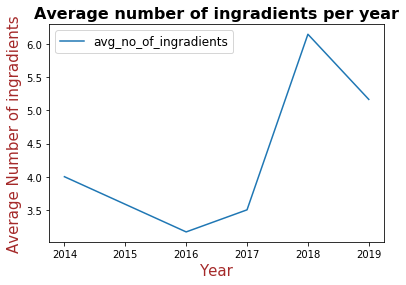

In [333]:
plt.plot(avgIng['year'],avgIng['avg_no_of_ingradients'])
plt.title("Average number of ingradients per year", fontsize=16, fontweight='bold')
plt.xlabel("Year",fontsize=15,color='brown')
plt.ylabel("Average Number of ingradients",fontsize=15,color='brown')
plt.legend(loc="upper left",prop={'size': 12})
plt.show()

In [161]:
pd.options.display.max_colwidth = -1

Merging drug names of every year with the previous results

In [173]:
(astraZenecaA.groupby(['year'], as_index=False, sort=False).agg(', '.join)).merge(avgIng,on='year')

,year,brand_name,avg_no_of_ingradients
0,2018,"CRESTOR, SEROQUEL, MOVANTIK, Esomeprazole magnesium, LOKELMA, Tudorza Pressair, NEXIUM, SEROQUEL XR, Byetta, ONGLYZA, BRILINTA, KOMBIGLYZE XR, Lynparza, TAGRISSO, IRESSA, IMFINZI, Lynparza, Daliresp, QTERN, NEXIUM I.V.",6.150000
1,2019,"BYDUREON, FARXIGA, LUMOXITI, XIGDUO XR, FASLODEX, BYDUREON BCise",5.166667
2,2017,"BEVESPI AEROSPHERE, CASODEX, SYMBICORT, FASENRA, CALQUENCE, Quetiapine Fumarate Extended Release",3.500000
3,2016,"ZOLADEX, ZURAMPIC, ZOLADEX, MERREM IV, PULMICORT FLEXHALER, PRILOSEC, TOPROL XL, CAPRELSA, SymlinPen, PULMICORT RESPULES, ATACAND HCT, ATACAND",3.166667
4,2014,ARIMIDEX,4.000000


#### I am assuming that brand name is the name of the drug. There is a column named 'generic_name' as well. Replacing brand_name by generic_name will change the results accordingly without affecting quantitative results

#### The above table gives desired results which gives average number of ingredients contained in AstraZeneca medicines per year.

### Part B

Let's only keep those columns which are required

In [337]:
astraZenecaR=astraZeneca[['effective_time','route','spl_product_data_elements']]

In [338]:
astraZenecaR['year']=(astraZenecaR['effective_time']).dt.year

/home/shreyas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [339]:
(astraZenecaR.columns)

Index(['effective_time', 'route', 'route', 'spl_product_data_elements',
       'year'],
      dtype='object')

Seems like the 'route' columns which is present twice in the parent dataframe are also present in the child table, one which has all the missing values

In [340]:
astraZenecaR[['route']].head(3)

,route,route
23671,NaN,[ORAL]
27978,NaN,[ORAL]
29577,NaN,NaN


In [341]:
astraZenecaR=astraZenecaR.dropna(axis=1, how='all')

In [342]:
astraZenecaR.head(3)

,effective_time,route,spl_product_data_elements,year
23671,2018-11-09,[ORAL],"[CRESTOR Rosuvastatin calcium ROSUVASTATIN CALCIUM ROSUVASTATIN LACTOSE MONOHYDRATE CELLULOSE, MICROCRYSTALLINE HYPROMELLOSES TRIACETIN TITANIUM DIOXIDE FERRIC OXIDE YELLOW biconvex 5;crestor CRESTOR Rosuvastatin calcium ROSUVASTATIN CALCIUM ROSUVASTATIN LACTOSE MONOHYDRATE CELLULOSE, MICROCRYSTALLINE TRIBASIC CALCIUM PHOSPHATE CROSPOVIDONE (15 MPA.S AT 5%) MAGNESIUM STEARATE HYPROMELLOSES TRIACETIN TITANIUM DIOXIDE FERRIC OXIDE RED biconvex 10;crestor CRESTOR Rosuvastatin calcium ROSUVASTATIN CALCIUM ROSUVASTATIN LACTOSE MONOHYDRATE CELLULOSE, MICROCRYSTALLINE TRIBASIC CALCIUM PHOSPHATE CROSPOVIDONE (15 MPA.S AT 5%) MAGNESIUM STEARATE HYPROMELLOSES TRIACETIN TITANIUM DIOXIDE FERRIC OXIDE RED biconvex 20;crestor CRESTOR Rosuvastatin calcium ROSUVASTATIN CALCIUM ROSUVASTATIN LACTOSE MONOHYDRATE CELLULOSE, MICROCRYSTALLINE TRIBASIC CALCIUM PHOSPHATE CROSPOVIDONE (15 MPA.S AT 5%) MAGNESIUM STEARATE HYPROMELLOSES TRIACETIN TITANIUM DIOXIDE FERRIC OXIDE RED biconvex 40;crestor]",2018
27978,2018-11-29,[ORAL],"[SEROQUEL Quetiapine fumarate QUETIAPINE FUMARATE QUETIAPINE POVIDONE, UNSPECIFIED CALCIUM PHOSPHATE, DIBASIC, DIHYDRATE CELLULOSE, MICROCRYSTALLINE SODIUM STARCH GLYCOLATE TYPE A POTATO MAGNESIUM STEARATE HYPROMELLOSES POLYETHYLENE GLYCOL, UNSPECIFIED TITANIUM DIOXIDE FERRIC OXIDE RED FERRIC OXIDE YELLOW LACTOSE MONOHYDRATE WATER peach biconvex SEROQUEL;25 SEROQUEL Quetiapine fumarate QUETIAPINE FUMARATE QUETIAPINE POVIDONE, UNSPECIFIED CALCIUM PHOSPHATE, DIBASIC, DIHYDRATE CELLULOSE, MICROCRYSTALLINE SODIUM STARCH GLYCOLATE TYPE A POTATO MAGNESIUM STEARATE HYPROMELLOSES POLYETHYLENE GLYCOL, UNSPECIFIED TITANIUM DIOXIDE LACTOSE MONOHYDRATE WATER FERRIC OXIDE YELLOW biconvex SEROQUEL;50 SEROQUEL Quetiapine fumarate QUETIAPINE FUMARATE QUETIAPINE POVIDONE, UNSPECIFIED CALCIUM PHOSPHATE, DIBASIC, DIHYDRATE CELLULOSE, MICROCRYSTALLINE SODIUM STARCH GLYCOLATE TYPE A POTATO LACTOSE MONOHYDRATE MAGNESIUM STEARATE HYPROMELLOSES POLYETHYLENE GLYCOL, UNSPECIFIED TITANIUM DIOXIDE FERRIC OXIDE YELLOW WATER biconvex SEROQUEL;100 SEROQUEL Quetiapine fumarate QUETIAPINE FUMARATE QUETIAPINE POVIDONE, UNSPECIFIED CALCIUM PHOSPHATE, DIBASIC, DIHYDRATE CELLULOSE, MICROCRYSTALLINE SODIUM STARCH GLYCOLATE TYPE A POTATO LACTOSE MONOHYDRATE MAGNESIUM STEARATE HYPROMELLOSES POLYETHYLENE GLYCOL, UNSPECIFIED TITANIUM DIOXIDE WATER biconvex SEROQUEL;200 SEROQUEL Quetiapine fumarate QUETIAPINE FUMARATE QUETIAPINE POVIDONE, UNSPECIFIED CALCIUM PHOSPHATE, DIBASIC, DIHYDRATE CELLULOSE, MICROCRYSTALLINE SODIUM STARCH GLYCOLATE TYPE A POTATO LACTOSE MONOHYDRATE MAGNESIUM STEARATE HYPROMELLOSES POLYETHYLENE GLYCOL, UNSPECIFIED TITANIUM DIOXIDE WATER biconvex SEROQUEL;300 SEROQUEL Quetiapine fumarate QUETIAPINE FUMARATE QUETIAPINE POVIDONE, UNSPECIFIED CALCIUM PHOSPHATE, DIBASIC, DIHYDRATE CELLULOSE, MICROCRYSTALLINE SODIUM STARCH GLYCOLATE TYPE A POTATO LACTOSE MONOHYDRATE MAGNESIUM STEARATE HYPROMELLOSES POLYETHYLENE GLYCOL, UNSPECIFIED TITANIUM DIOXIDE FERRIC OXIDE YELLOW WATER biconvex SEROQUEL;400]",2018
29577,2019-02-15,NaN,"[BYDUREON exenatide EXENATIDE EXENATIDE POLY(DL-LACTIC-CO-GLYCOLIC ACID), (50:50; 63000 MW) SUCROSE CARBOXYMETHYLCELLULOSE SODIUM, UNSPECIFIED FORM SODIUM CHLORIDE POLYSORBATE 20 SODIUM PHOSPHATE, MONOBASIC, MONOHYDRATE SODIUM PHOSPHATE, DIBASIC, HEPTAHYDRATE WATER BYDUREON exenatide Bydureon exenatide EXENATIDE EXENATIDE POLY(DL-LACTIC-CO-GLYCOLIC ACID), (50:50; 63000 MW) SUCROSE Diluent Diluent CARBOXYMETHYLCELLULOSE SODIUM, UNSPECIFIED FORM SODIUM CHLORIDE POLYSORBATE 20 SODIUM PHOSPHATE, MONOBASIC, MONOHYDRATE SODIUM PHOSPHATE, DIBASIC, HEPTAHYDRATE WATER]",2019


Lets keep only those rows which has delivery route mentioned in the dataframe

In [343]:
astraZenecaR=astraZenecaR.dropna(subset=['route'])

Converting list type column which has single element to the string.

In [344]:
 astraZenecaR['route']=astraZenecaR['route'].apply(lambda x: ''.join(map(str, x)))

In [345]:
astraZenecaR.head(3)

,effective_time,route,spl_product_data_elements,year
23671,2018-11-09,ORAL,"[CRESTOR Rosuvastatin calcium ROSUVASTATIN CALCIUM ROSUVASTATIN LACTOSE MONOHYDRATE CELLULOSE, MICROCRYSTALLINE HYPROMELLOSES TRIACETIN TITANIUM DIOXIDE FERRIC OXIDE YELLOW biconvex 5;crestor CRESTOR Rosuvastatin calcium ROSUVASTATIN CALCIUM ROSUVASTATIN LACTOSE MONOHYDRATE CELLULOSE, MICROCRYSTALLINE TRIBASIC CALCIUM PHOSPHATE CROSPOVIDONE (15 MPA.S AT 5%) MAGNESIUM STEARATE HYPROMELLOSES TRIACETIN TITANIUM DIOXIDE FERRIC OXIDE RED biconvex 10;crestor CRESTOR Rosuvastatin calcium ROSUVASTATIN CALCIUM ROSUVASTATIN LACTOSE MONOHYDRATE CELLULOSE, MICROCRYSTALLINE TRIBASIC CALCIUM PHOSPHATE CROSPOVIDONE (15 MPA.S AT 5%) MAGNESIUM STEARATE HYPROMELLOSES TRIACETIN TITANIUM DIOXIDE FERRIC OXIDE RED biconvex 20;crestor CRESTOR Rosuvastatin calcium ROSUVASTATIN CALCIUM ROSUVASTATIN LACTOSE MONOHYDRATE CELLULOSE, MICROCRYSTALLINE TRIBASIC CALCIUM PHOSPHATE CROSPOVIDONE (15 MPA.S AT 5%) MAGNESIUM STEARATE HYPROMELLOSES TRIACETIN TITANIUM DIOXIDE FERRIC OXIDE RED biconvex 40;crestor]",2018
27978,2018-11-29,ORAL,"[SEROQUEL Quetiapine fumarate QUETIAPINE FUMARATE QUETIAPINE POVIDONE, UNSPECIFIED CALCIUM PHOSPHATE, DIBASIC, DIHYDRATE CELLULOSE, MICROCRYSTALLINE SODIUM STARCH GLYCOLATE TYPE A POTATO MAGNESIUM STEARATE HYPROMELLOSES POLYETHYLENE GLYCOL, UNSPECIFIED TITANIUM DIOXIDE FERRIC OXIDE RED FERRIC OXIDE YELLOW LACTOSE MONOHYDRATE WATER peach biconvex SEROQUEL;25 SEROQUEL Quetiapine fumarate QUETIAPINE FUMARATE QUETIAPINE POVIDONE, UNSPECIFIED CALCIUM PHOSPHATE, DIBASIC, DIHYDRATE CELLULOSE, MICROCRYSTALLINE SODIUM STARCH GLYCOLATE TYPE A POTATO MAGNESIUM STEARATE HYPROMELLOSES POLYETHYLENE GLYCOL, UNSPECIFIED TITANIUM DIOXIDE LACTOSE MONOHYDRATE WATER FERRIC OXIDE YELLOW biconvex SEROQUEL;50 SEROQUEL Quetiapine fumarate QUETIAPINE FUMARATE QUETIAPINE POVIDONE, UNSPECIFIED CALCIUM PHOSPHATE, DIBASIC, DIHYDRATE CELLULOSE, MICROCRYSTALLINE SODIUM STARCH GLYCOLATE TYPE A POTATO LACTOSE MONOHYDRATE MAGNESIUM STEARATE HYPROMELLOSES POLYETHYLENE GLYCOL, UNSPECIFIED TITANIUM DIOXIDE FERRIC OXIDE YELLOW WATER biconvex SEROQUEL;100 SEROQUEL Quetiapine fumarate QUETIAPINE FUMARATE QUETIAPINE POVIDONE, UNSPECIFIED CALCIUM PHOSPHATE, DIBASIC, DIHYDRATE CELLULOSE, MICROCRYSTALLINE SODIUM STARCH GLYCOLATE TYPE A POTATO LACTOSE MONOHYDRATE MAGNESIUM STEARATE HYPROMELLOSES POLYETHYLENE GLYCOL, UNSPECIFIED TITANIUM DIOXIDE WATER biconvex SEROQUEL;200 SEROQUEL Quetiapine fumarate QUETIAPINE FUMARATE QUETIAPINE POVIDONE, UNSPECIFIED CALCIUM PHOSPHATE, DIBASIC, DIHYDRATE CELLULOSE, MICROCRYSTALLINE SODIUM STARCH GLYCOLATE TYPE A POTATO LACTOSE MONOHYDRATE MAGNESIUM STEARATE HYPROMELLOSES POLYETHYLENE GLYCOL, UNSPECIFIED TITANIUM DIOXIDE WATER biconvex SEROQUEL;300 SEROQUEL Quetiapine fumarate QUETIAPINE FUMARATE QUETIAPINE POVIDONE, UNSPECIFIED CALCIUM PHOSPHATE, DIBASIC, DIHYDRATE CELLULOSE, MICROCRYSTALLINE SODIUM STARCH GLYCOLATE TYPE A POTATO LACTOSE MONOHYDRATE MAGNESIUM STEARATE HYPROMELLOSES POLYETHYLENE GLYCOL, UNSPECIFIED TITANIUM DIOXIDE FERRIC OXIDE YELLOW WATER biconvex SEROQUEL;400]",2018
29771,2018-02-28,ORAL,"[MOVANTIK naloxegol oxalate NALOXEGOL OXALATE NALOXEGOL MANNITOL MICROCRYSTALLINE CELLULOSE CROSCARMELLOSE SODIUM MAGNESIUM STEARATE PROPYL GALLATE HYPROMELLOSE, UNSPECIFIED TITANIUM DIOXIDE POLYETHYLENE GLYCOL 400 FERRIC OXIDE RED FERROSOFERRIC OXIDE WATER mauve biconvex nGL;12;5 MOVANTIK naloxegol oxalate NALOXEGOL OXALATE NALOXEGOL MANNITOL MICROCRYSTALLINE CELLULOSE CROSCARMELLOSE SODIUM MAGNESIUM STEARATE PROPYL GALLATE HYPROMELLOSE, UNSPECIFIED TITANIUM DIOXIDE POLYETHYLENE GLYCOL 400 FERRIC OXIDE RED FERROSOFERRIC OXIDE WATER mauve biconvex nGL;25]",2018


Adding another column which contains number of ingradients for every entry

In [346]:
astraZenecaR['no_ingradients'] = astraZenecaR['spl_product_data_elements'].apply(lambda b: len(''.join(b).split(',')))

Aggregating dataframe by year and delivery route to get desired output

In [367]:
routeAvg=astraZenecaR.groupby(['year','route'])['no_ingradients'].mean().reset_index()

In [368]:
routeAvg

,year,route,no_ingradients
0,2014,ORAL,4.000000
1,2016,INTRAVENOUS,1.000000
2,2016,ORAL,4.166667
3,2016,RESPIRATORY (INHALATION),3.500000
4,2016,SUBCUTANEOUS,1.666667
5,2017,ORAL,5.666667
6,2017,RESPIRATORY (INHALATION),1.500000
7,2017,SUBCUTANEOUS,1.000000
8,2018,INTRAVENOUS,1.000000
9,2018,ORAL,7.437500


### Optional 

### 1) Predicting number of interaction for next year

Selecting the columns of our interest

In [175]:
opt1=astraZeneca[['effective_time','spl_product_data_elements']]

Converting the date into year

In [176]:
opt1['year']=(opt1['effective_time']).dt.year

/home/shreyas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [179]:
 opt1['ingradients']=opt1['spl_product_data_elements'].apply(lambda a: (''.join(map(str,a))))

/home/shreyas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [181]:
opt2=(opt1.groupby(['year'], as_index=False, sort=False).agg(', '.join))

Getting unique ingradients per year.

In [183]:
opt2['ingradients']=opt2['ingradients'].apply(lambda b: list(set(''.join(b).split(','))))

In [184]:
opt2

year  \
0  2018   
1  2019   
2  2017   
3  2016   
4  2014   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

The approach which I am thinking is: <br>
    1) Observe trend of number of new ingradients introduced every year.<br>
    2) Observe trend of number of old ingradients removed per year<br>
    3) Transform those trends as the feature of dataset along with year and predict new trend using linear regression where number of ingradients in response variable


In [196]:
for i in range(opt2.shape[0]-1):
    print(set(opt2['ingradients'].iloc[i]) & set(opt2['ingradients'].iloc[i+1]))

{' DIBASIC'}
set()
set()
set()


There ain't any common ingradients except for year 2016 (only 1). SO the proposed approach wont work in this case.

In [198]:
opt2['no_ingradients'] = opt2['ingradients'].apply(lambda b: len(b))

In [266]:
ts=opt2[['year','no_ingradients']]

In [267]:
ts=ts.sort_values('year')
ts

,year,no_ingradients
4,2014,4
3,2016,34
2,2017,17
0,2018,79
1,2019,20


Observing the trend of number of unique ingradients

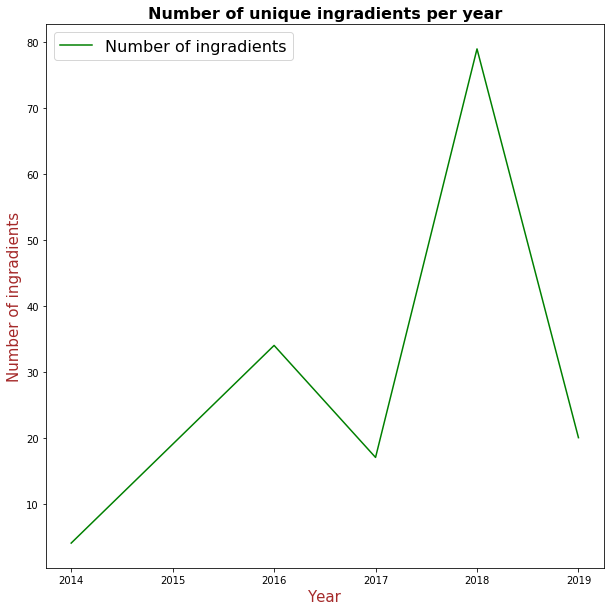

In [268]:
plt.figure(figsize=(10,10))
plt.plot(ts['year'],ts['no_ingradients'],color='g',label='Number of ingradients')
plt.title("Number of unique ingradients per year", fontsize=16, fontweight='bold')
plt.xlabel("Year",fontsize=15,color='brown')
plt.ylabel("Number of ingradients",fontsize=15,color='brown')
plt.legend(loc="upper left",prop={'size': 16})
plt.show()

I am assuming that I have to predict the data for 2019 (as data till only 2019 march is present and we cant use just 3 months of data which is very small, to predict data of next year). 

Converting year variable to datatime.

In [269]:
ts.year = pd.to_datetime(ts.year,format='%Y') 


As, we are going with only years, we will resample the year to make it a date.(usually taking first day of year as date)

In [270]:
ts.index = ts.year

ts=ts.resample('Y').mean()


Splitting data into train test sets. As we want to predict data for only 1 year, only last entry will be in the test set and all remaining data will be used for training

In [303]:
train=ts[0:-1]
test=ts[-2:]

In [329]:
ts['no_ingradients'].rolling(3).mean().iloc[-1]

38.666666666666664

#### Using moving average method for time series forecasting

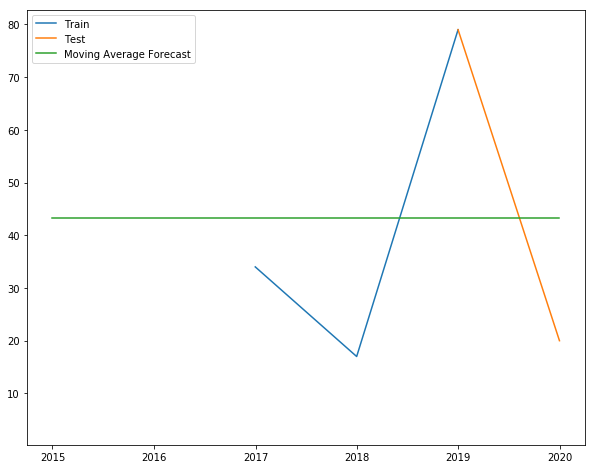

In [327]:
y_hat_avg = ts.copy()
y_hat_avg['moving_avg_forecast'] = train['no_ingradients'].rolling(3).mean().iloc[-1]
plt.figure(figsize=(10,8))
plt.plot(train['no_ingradients'], label='Train')
plt.plot(test['no_ingradients'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [325]:
y_hat_avg

,no_ingradients,moving_avg_forecast
year,,
2014-12-31,4.0,43.333333
2015-12-31,NaN,43.333333
2016-12-31,34.0,43.333333
2017-12-31,17.0,43.333333
2018-12-31,79.0,43.333333
2019-12-31,20.0,43.333333


This result could have been better if more than 4 years of continuous data was present. Data is too insufficient to fit ARMA, ARIMA models as only 3 years of continuous data is present. 

Other possible ways could be using multivariate time series, where feature engineering can be done and more features such as month, day, day of week can be created from effective time variable. 

### 2) Most common Drug interaction 

In [163]:
astraZeneca[['drug_interactions']].head(3)

,drug_interactions
23671,"[7 DRUG INTERACTIONS • Cyclosporine: Combination increases rosuvastatin exposure. Limit CRESTOR dose to 5 mg once daily. (2.4, 5.1, 7.1, 12.3) • Gemfibrozil: Combination should be avoided. If used together, limit CRESTOR dose to 10 mg once daily. (2.4, 5.1, 7.2) • Atazanavir/ritonavir, lopinavir/ritonavir, or simeprevir: Combination increases rosuvastatin exposure. Limit CRESTOR dose to 10 mg once daily. (2.4, 5.1, 7.3, 12.3) • Coumarin anticoagulants: Combination prolongs INR. Achieve stable INR prior to starting CRESTOR. Monitor INR frequently until stable upon initiation or alteration of CRESTOR therapy. (5.3, 7.4) • Concomitant lipid-lowering therapies: Use with fibrates or lipid-modifying doses (≥1 g/day) of niacin increases the risk of adverse skeletal muscle effects. Caution should be used when prescribing with CRESTOR. (5.1, 7.5, 7.6) 7.1 Cyclosporine Cyclosporine increased rosuvastatin exposure and may result in increased risk of myopathy. Therefore, in patients taking cyclosporine, the dose of CRESTOR should not exceed 5 mg once daily [see Dosage and Administration (2.4) , Warnings and Precautions (5.1) and Clinical Pharmacology (12.3)]. 7.2 Gemfibrozil Gemfibrozil significantly increased rosuvastatin exposure. Due to an observed increased risk of myopathy/rhabdomyolysis, combination therapy with CRESTOR and gemfibrozil should be avoided. If used together, the dose of CRESTOR should not exceed 10 mg once daily [see Clinical Pharmacology (12.3)]. 7.3 Protease Inhibitors Coadministration of rosuvastatin with certain protease inhibitors has differing effects on rosuvastatin exposure and may increase risk of myopathy. Simeprevir, which is a hepatitis C virus (HCV) protease inhibitor, or combinations of atazanavir/ritonavir or lopinavir/ritonavir, which are HIV-1 protease inhibitors, increase rosuvastatin exposure [see Table 4 – Clinical Pharmacology (12.3) ]. For these protease inhibitors, the dose of CRESTOR should not exceed 10 mg once daily. The combinations of fosamprenavir/ritonavir or tipranavir/ritonavir, which are HIV-1 protease inhibitors, produce little or no change in rosuvastatin exposure. Caution should be exercised when rosuvastatin is coadministered with protease inhibitors [see Dosage and Administration (2.4) , Warnings and Precautions (5.1) and Clinical Pharmacology (12.3)]. 7.4 Coumarin Anticoagulants CRESTOR significantly increased INR in patients receiving coumarin anticoagulants. Therefore, caution should be exercised when coumarin anticoagulants are given in conjunction with CRESTOR. In patients taking coumarin anticoagulants and CRESTOR concomitantly, INR should be determined before starting CRESTOR and frequently enough during early therapy to ensure that no significant alteration of INR occurs [see Warnings and Precautions (5.3) and Clinical Pharmacology (12.3)]. 7.5 Niacin The risk of skeletal muscle effects may be enhanced when CRESTOR is used in combination with lipid-modifying doses (≥1 g/day) of niacin; caution should be used when prescribing with CRESTOR [see Warnings and Precautions (5.1)]. 7.6 Fenofibrate When CRESTOR was coadministered with fenofibrate, no clinically significant increase in the AUC of rosuvastatin or fenofibrate was observed. Because it is known that the risk of myopathy during treatment with HMG-CoA reductase inhibitors is increased with concomitant use of fenofibrates, caution should be used when prescribing fenofibrates with CRESTOR [see Warnings and Precautions (5.1) and Clinical Pharmacology (12.3)]. 7.7 Colchicine Cases of myopathy, including rhabdomyolysis, have been reported with HMG‑CoA reductase inhibitors, including rosuvastatin, coadministered with colchicine, and caution should be exercised when prescribing CRESTOR with colchicine [see Warnings and Precautions (5.1)].]"
27978,"[7 DRUG INTERACTIONS • Concomitant use of strong CYP3A4 inhibitors: Reduce quetiapine dose to one sixth when coadministered with strong CYP3A4 inhibitors (e.g

It is difficult to get any particular pattern after comparing drug interaction column

There is another column called 'drug interaction table'. Let's try to find concrete patterns from that column

In [164]:
astraZeneca['drug_interactions_table']

23671     NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

Most of the rows contain missing values. Still for the remaining rows, we get a html table. Parsing through the table might give us drug interaction. We can find most common interactions only based on the entries which has table.

Let's try for rows 2,3,4 (which has tables)

In [170]:
from bs4 import BeautifulSoup as BS
for j in range(2,5):
    k=''.join(map(str, astraZeneca['drug_interactions_table'].iloc[j]))
    soup = BS(k)
    print('Entry: ',j)
    for i in range(1,len(soup.findAll(lambda tag: tag.name == 'tr' ))):
        if len(soup.find_all('tr')[i].find_all('td'))>1:
            print(soup.find_all('tr')[i].find('td').get_text())
    print('\n\n')

Entry:  2
 Clinical Impact 
 Intervention 
 Clinical Impact 
 Intervention 
 Clinical Impact 
 Intervention 



Entry:  3
  CYP3A4 Inhibitors  
   •Strong CYP3A4 inhibitors (e.g., ketoconazole, itraconazole, clarithromycin)  
   •Moderate CYP3A4 inhibitors (e.g., diltiazem, erythromycin, verapamil)  
   •Weak CYP3A4 inhibitors (e.g., quinidine, cimetidine)  
   •Grapefruit or grapefruit juiceThe effect of grapefruit juice varies widely among brands and is concentration-, dose-, and preparation dependent. Studies have shown that it can be classified as a “strong CYP3A inhibitor” when a certain preparation was used (e.g., high dose, double strength) or as a “moderate CYP3A inhibitor” when another preparation was used (e.g., low dose, single strength).   
     CYP3A4 Inducers   
   •Strong CYP3A4 inducers (e.g., rifampin, carbamazepine, St. John’s Wort)  
  Other Drug Interactions  
   •Other opioid antagonists  



Entry:  4
  Metformin (1000 mg) 
  Pioglitazone (45 mg) 
  Sitagliptin (1

Even the drug interaction table fails to give some specific patterns to conclude about the most common interactions

Possible ways to find drug interactions can be :<br><br>
    1) summarizing the drug_interaction column (using NLTK) which will give some sentences from the paragraphs. After that we can use tf-idf (some medical keywords will be the terms) or n-gram to find frequency of sentences/interaction. After averaging the frequency across the documents in which the term/interaction is present, we can get most common interaction. <br><br>
    2) Average Word-count using hadoop for every document. In this case we will only consider keywords relevant to drug interactions.
    

Also more clarification on pattern of drug interaction would have helped to come up with more solutions.

### 3) Deploying analysis/model as a tool

I am assuming users are other employees of Astrazeneca who are not familiar with data science field. <br><br>
1) We can make a dashboard/GUI where different graphs can be displayed which can give comparative study of various components of the drugs using matplotlib (python), ggplo2 (R).(The example graphs are generated below the results) It can be made interactive using tableau.<br><br>
For example, we can draw 
2) We can display various trends using time series and can also add some button to get predictions for next years based on present data. <br><br>
Also we can add more functionality in this model like clustering drugs based on their ingradients or usage.<br><br>
3) If the same table schema is followed, We can keep running a script in background which will give real time analysis and predictions (it would be more useful if we want to deal with large amount of data). <br><br>
4) We can add additional functionality where user can insert, delete entries and update by just mentioning some column value/s. In this case user won't have to deal of programming and the dashboard will allow them to make changes in the data. <br><br>
